In [435]:
import random
import numpy as np
from tqdm.auto import tqdm
import matplotlib.pyplot as plt


from BostonMech import BostonMechanism
from DA import DeferredAcceptance
import utils as utils


%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [436]:

n_schools = 30  # source: https://en.wikipedia.org/wiki/Boston_Public_Schools#Middle_Schools
min_capa = 50 #50
max_capa = 200 #400
n_students = 4000 #5000
n_soph = 200 #500

n_iter = 50

DA_results, BM_results = [], []
for it in tqdm(range(n_iter)):
    DA_result, BM_result = utils.run_simulation(n_students, n_schools, [min_capa, max_capa], n_soph)
    DA_results.append(DA_result)
    BM_results.append(BM_result)


100%|██████████| 50/50 [01:00<00:00,  1.21s/it]


In [437]:
def plot_results(metric, title, y_label, by_group, canvas):
    # plot average results
    
    if by_group:
        ticks = ['DA (all)', 'DA (soph)', 'DA (sinc)', 'BM (all)', 'BM (soph)', 'BM (sinc)']
    else:
        ticks = ['DA', 'BM']

    average_ranking = np.zeros((n_iter, 2*len(DA_result[f'ranking_{metric}'])))
    for it in range(n_iter):
        average_ranking[it,:] = DA_results[it][f'ranking_{metric}'] + BM_results[it][f'ranking_{metric}']

    ave_ranking_mean = average_ranking.mean(axis=0)
    ave_ranking_std = average_ranking.std(axis=0)

    canvas.bar(range(len(ave_ranking_mean)), ave_ranking_mean, color='steelblue', yerr=1.96 * ave_ranking_std,capsize=5)
    plt.xticks(range(len(ave_ranking_mean)),ticks);
    canvas.set(title=title, 
            ylabel=y_label, xlabel='student sample');
 

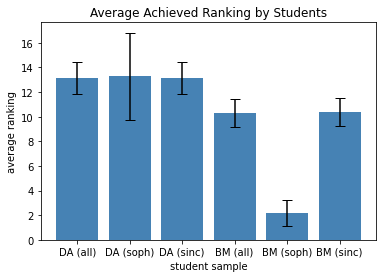

In [444]:
_, axs = plt.subplots(1,1,figsize=(6,4))
plot_results('ave', 'Average Achieved Ranking by Students', 'average ranking', by_group=True, canvas=axs)
plt.savefig('figures/ave_ranking.png', bbox_inches='tight')

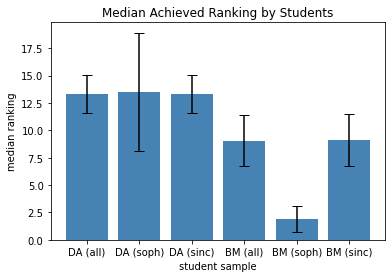

In [443]:
_, axs = plt.subplots(1,1,figsize=(6,4))
plot_results('med', 'Median Achieved Ranking by Students', 'median ranking', by_group=True, canvas=axs)
plt.savefig('figures/med_ranking.png', bbox_inches='tight')

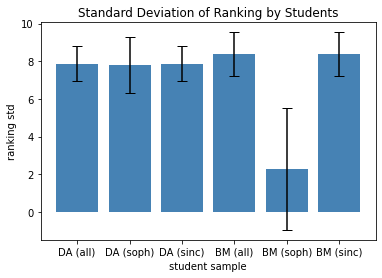

In [442]:
_, axs = plt.subplots(1,1,figsize=(6,4))
plot_results('std', 'Standard Deviation of Ranking by Students', 'ranking std', by_group=True, canvas=axs)
plt.savefig('figures/std_ranking.png', bbox_inches='tight')